In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, precision_recall_curve
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bioresponse.csv")
ydf = df['Activity']
xdf = df.drop(columns = ['Activity'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
        xdf, ydf, test_size=0.2, random_state=68)
df.head(7)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.00,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.50,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
5,0,0.133333,0.771035,0.20,0.25,0.122153,0.677398,0.267224,0.611112,0.701421,...,0,0,0,0,0,0,0,0,0,0
6,1,0.066700,0.567401,0.10,0.00,0.116578,0.689802,0.274886,0.548509,0.785429,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# ex 4
def predict_with_threshold(prob_matrix, threshold: int):
    prob_array = np.array(prob_matrix[:,1]) # Make a copy, not a representation
    first_class = 1
    zeros_class = 0

    for prob in np.nditer(prob_array, op_flags = ['readwrite']):
        if prob > threshold:
            prob[...] = first_class
        else:
            prob[...] = zeros_class

    return prob_array

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
| Model | Accuracy           | Precision          | Recall             | F1                 | LogLoss            |
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   SDT | 0.7683089214380826 | 0.7706013363028953 | 0.829736211031175  | 0.7990762124711317 | 8.00243602030595   |
| SDTwT | 0.7696404793608522 | 0.7573839662447257 | 0.8609112709832134 | 0.8058361391694724 | 7.956458415478058  |
|   DDT | 0.7430093209054593 | 0.7842639593908629 | 0.7410071942446043 | 0.7620221948212084 | 8.876234101197507  |
| DDTwT | 0.7443408788282291 | 0.7848101265822784 | 0.7434052757793765 | 0.7635467980295567 | 8.830243719846097  |
|   RFS | 0.7177097203728362 | 0.7367205542725174 | 0.7649880095923262 | 0.7505882352941178 | 9.750082223472846  |
| RFSwT | 0.5552596537949401 | 0.5552596537949401 | 1.0                | 0.71404

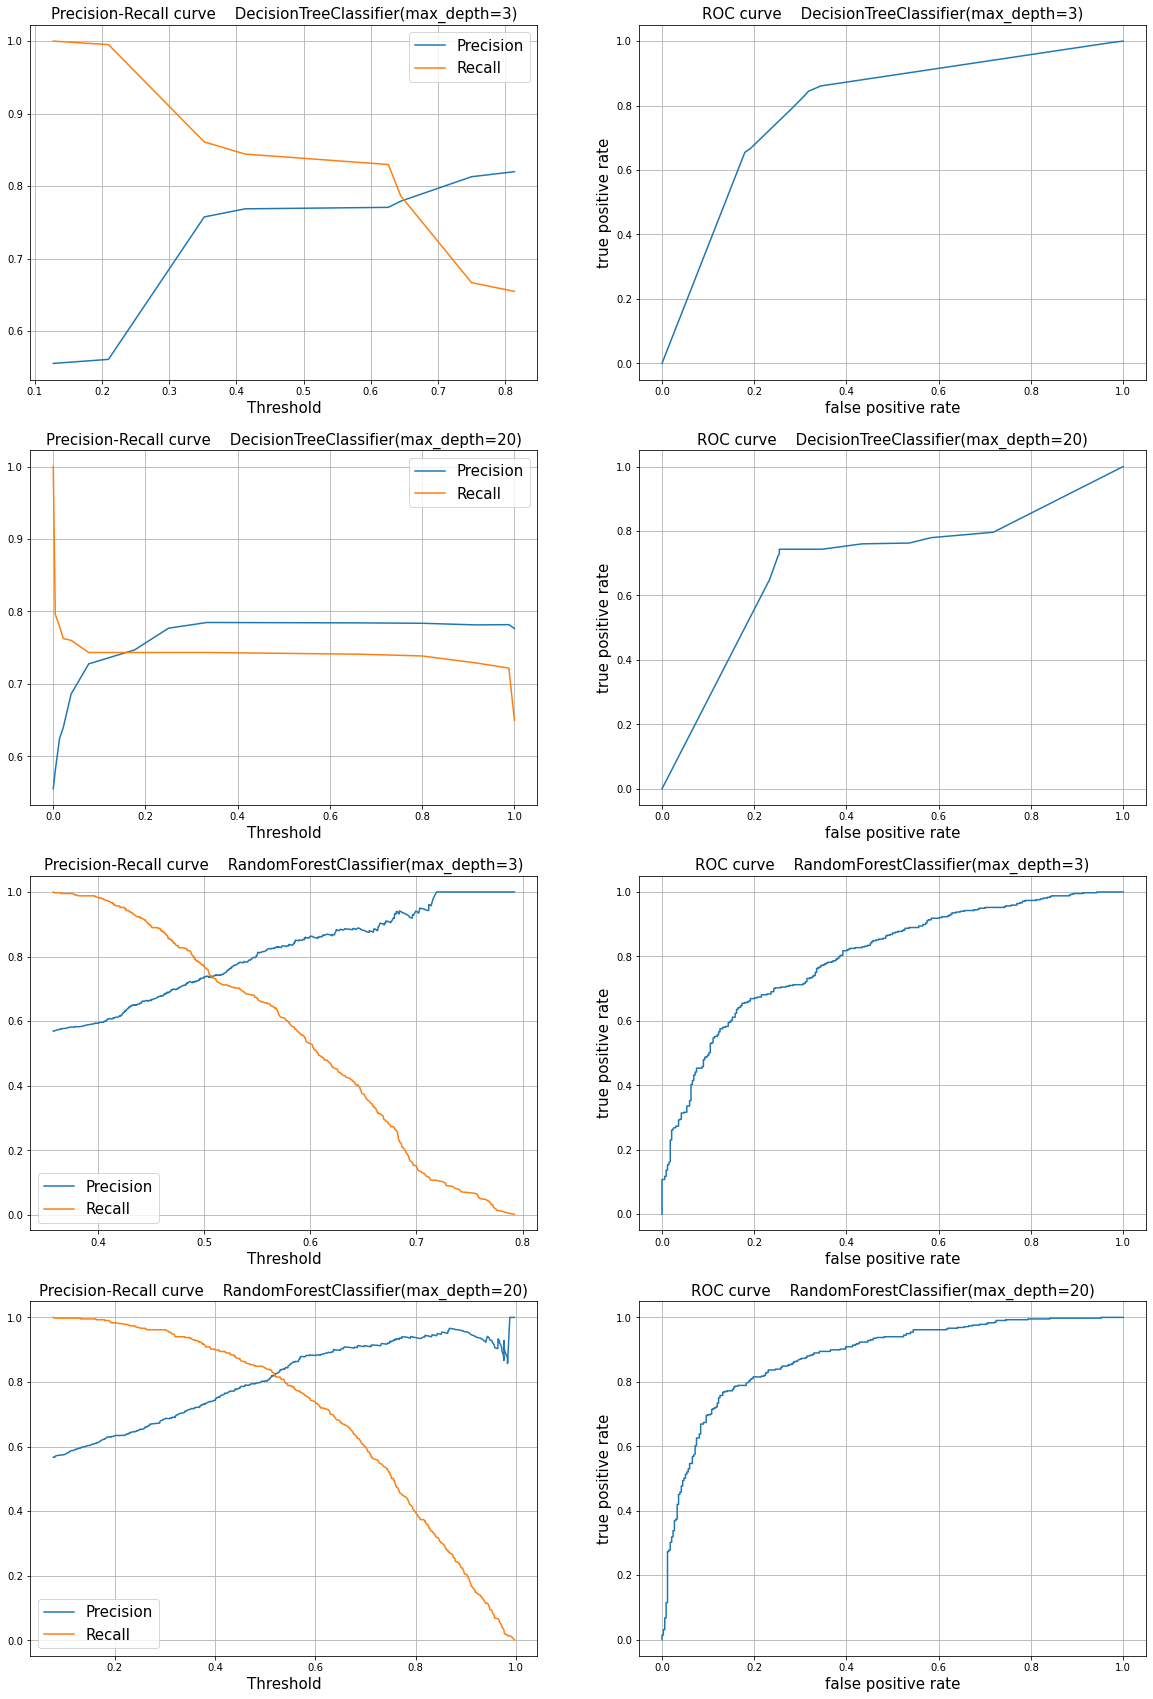

In [4]:
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1", "LogLoss"]
# plt.figure(figsize=(20,30))
it = 0
models = {
    "SDT": DecisionTreeClassifier(max_depth=3),
    "DDT": DecisionTreeClassifier(max_depth=20),
    "RFS": RandomForestClassifier(max_depth=3),
    "RFD": RandomForestClassifier(max_depth=20),
}
plt.figure(figsize=(20,30))
for i in models.keys():

    #ex1
    model = models[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #ex2
    table.add_row([str(i), 
                    accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred), 
                    recall_score(y_test, y_pred), 
                    f1_score(y_test, y_pred), 
                    log_loss(y_test, y_pred)])

    #ex4
    y_pred_proba = model.predict_proba(X_test)
    y_thres = predict_with_threshold(y_pred_proba, 0.28)
    table.add_row([str(str(i)+ 'wT'), 
                    accuracy_score(y_test, y_thres), 
                    precision_score(y_test, y_thres), 
                    recall_score(y_test, y_thres), 
                    f1_score(y_test, y_thres), 
                    log_loss(y_test, y_thres)])    

    #ex3
    prec, rec, thresh = precision_recall_curve(y_test, y_pred_proba[:,1])
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba[:,1])

    plt.subplot(4, 2, it*2+1)
    plt.grid()
    plt.plot(thresh, prec[:-1], label="Precision")
    plt.plot(thresh, rec[:-1], label="Recall")
    plt.xlabel(u"Threshold",fontsize = 15)
    plt.title(u'Precision-Recall curve    '+str(models[i]),fontsize = 15)
    plt.legend(fontsize = 15)

    plt.subplot(4, 2, it*2+2)
    plt.plot(fpr, tpr)
    plt.grid()
    plt.xlabel("false positive rate",fontsize = 15)
    plt.ylabel("true positive rate",fontsize = 15)
    plt.title(u"ROC curve    "+str(models[i]),fontsize = 15)

    it += 1
    
table.align = 'l'
table.align['Model'] = 'r'
print(table)